In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('sample_data_intw.csv')

In [3]:
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
data.shape

(209593, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
Unnamed: 0              209593 non-null int64
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-nul

In [7]:
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [9]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
data.head(1)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20


In [11]:
data.describe(include='all')

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,47819I90840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


In [12]:
data.drop(['pcircle' ,'msisdn' ],axis=1,inplace=True)

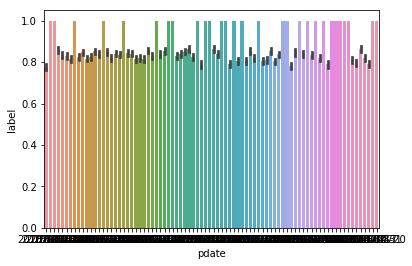

In [13]:
sn.barplot(x='pdate',y='label',data=data)

In [14]:
count_of_1 = 0
count_of_0 = 0
for i in data['label']:
    if i == 1:
        count_of_1+=1
    else:
        count_of_0+=1
print(count_of_1)
print(count_of_0)

#it is an imbalanced dataset

183431
26162


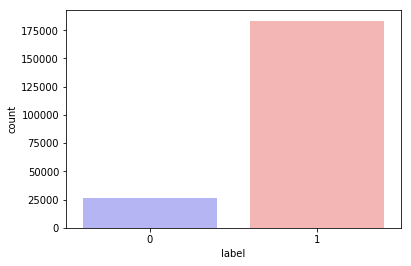

In [16]:
sn.countplot(x='label',data=data, palette='bwr')

In [17]:
x = data.drop('label', axis = 1)
y = data['label']

In [18]:
labelencoder = LabelEncoder()
x.pdate = labelencoder.fit_transform(x.pdate)

In [19]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,49
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,70
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,79
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,5
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,21


In [20]:
labels=dict(enumerate(data.columns))

In [21]:
labels

{0: 'label',
 1: 'aon',
 2: 'daily_decr30',
 3: 'daily_decr90',
 4: 'rental30',
 5: 'rental90',
 6: 'last_rech_date_ma',
 7: 'last_rech_date_da',
 8: 'last_rech_amt_ma',
 9: 'cnt_ma_rech30',
 10: 'fr_ma_rech30',
 11: 'sumamnt_ma_rech30',
 12: 'medianamnt_ma_rech30',
 13: 'medianmarechprebal30',
 14: 'cnt_ma_rech90',
 15: 'fr_ma_rech90',
 16: 'sumamnt_ma_rech90',
 17: 'medianamnt_ma_rech90',
 18: 'medianmarechprebal90',
 19: 'cnt_da_rech30',
 20: 'fr_da_rech30',
 21: 'cnt_da_rech90',
 22: 'fr_da_rech90',
 23: 'cnt_loans30',
 24: 'amnt_loans30',
 25: 'maxamnt_loans30',
 26: 'medianamnt_loans30',
 27: 'cnt_loans90',
 28: 'amnt_loans90',
 29: 'maxamnt_loans90',
 30: 'medianamnt_loans90',
 31: 'payback30',
 32: 'payback90',
 33: 'pdate'}

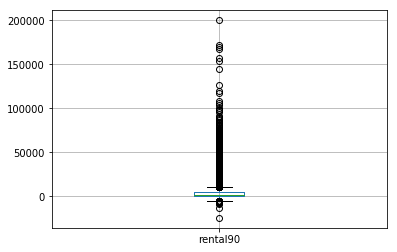

In [22]:
data.boxplot('rental90')

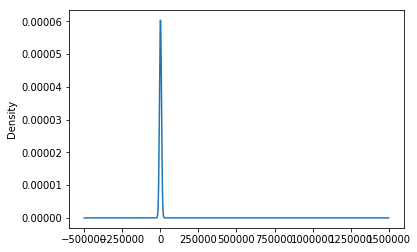

In [23]:
data.aon.plot(kind='density')

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [28]:
# splitting the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# splitting the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):
    classifier = RandomForestClassifier(n_estimators = i, class_weight='balanced', criterion = 'gini', random_state = 42)

    # fitting the model on crossvalidation train
    classifier.fit(X_tr, y_tr)

    # predicting the response on the crossvalidation train
    pred = classifier.predict(X_cv)

    # evaluating CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for estimators = %d is %d%%' % (i, acc))


CV accuracy for estimators = 1 is 88%

CV accuracy for estimators = 3 is 90%

CV accuracy for estimators = 5 is 90%

CV accuracy for estimators = 7 is 91%

CV accuracy for estimators = 9 is 91%

CV accuracy for estimators = 11 is 91%

CV accuracy for estimators = 13 is 91%

CV accuracy for estimators = 15 is 91%

CV accuracy for estimators = 17 is 91%

CV accuracy for estimators = 19 is 91%

CV accuracy for estimators = 21 is 91%

CV accuracy for estimators = 23 is 91%

CV accuracy for estimators = 25 is 91%

CV accuracy for estimators = 27 is 91%

CV accuracy for estimators = 29 is 91%


In [44]:
model = RandomForestClassifier(n_estimators = 7, class_weight='balanced', criterion = 'gini', random_state = 42)
model.fit(X_1,y_1)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=7, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [51]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
acc

91.4660135500493

In [52]:
pred = model.predict(X_test)
print('\n****Test accuracy for estimators = 7 is %d%%' % (acc))


****Test accuracy for estimators = 7 is 91%


In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(pred,y_test))

             precision    recall  f1-score   support

          0       0.50      0.74      0.59      5310
          1       0.97      0.93      0.95     57568

avg / total       0.93      0.91      0.92     62878



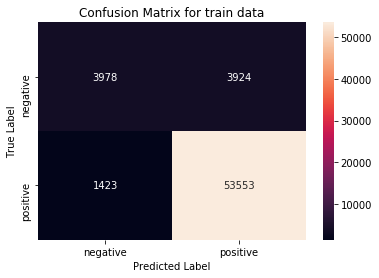

In [43]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sn.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()